# HW 7-2 - Tim Demetriades
## Principle Component Analysis
4/10/2021

Here we use the 35-factor time series consisting of 30 industry (Food, Beer, Smoke, etc), Market-risk free (M-r), SMB (Small minus big), HML (High minus low), RF (Riskfreerate), and Momentum.

### Part 1
Perform principal components analysis on the four-factor time series (market-RF, SMB, HML, and Momentum) in HW1.  

How many principal components account for 75% of the covariance matrix trace (i.e., the eigenvalue summations). You can use either Matlab, R, or Python for this PCA decomposition.

#### Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.drop(['Date'], axis=1, inplace=True)
columns = df.columns
columns

Index(['Mkt-RF', 'SMB', 'HML', 'RF', 'Mom', 'Food', 'Beer', 'Smoke', 'Games',
       'Books', 'Hshld', 'Clths', 'Hlth', 'Chems', 'Txtls', 'Cnstr', 'Steel',
       'FabPr', 'ElcEq', 'Autos', 'Carry', 'Mines', 'Coal', 'Oil', 'Util',
       'Telcm', 'Servs', 'BusEq', 'Paper', 'Trans', 'Whlsl', 'Rtail', 'Meals',
       'Fin', 'Other'],
      dtype='object')

In [4]:
print(df.shape)
df.head()

(948, 35)


,Mkt-RF,SMB,HML,RF,Mom,Food,Beer,Smoke,Games,Books,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
0,-0.10,-0.09,4.72,0.25,0.36,-0.70,0.57,-0.33,2.46,9.67,...,1.88,2.08,-1.45,-2.60,1.44,-17.93,-3.34,1.53,-2.48,-4.13
1,4.32,0.31,3.40,0.26,-1.67,4.29,12.83,1.58,1.43,1.41,...,3.97,8.90,4.85,5.21,5.20,3.49,4.48,6.81,2.77,0.30
2,0.33,-1.77,-2.42,0.30,2.97,1.98,-13.56,5.55,0.57,-0.28,...,5.56,-7.80,4.30,-8.39,1.06,-20.47,3.05,-2.44,1.41,2.28
3,0.42,0.30,1.03,0.25,4.53,2.60,2.85,4.09,-3.34,-0.96,...,-2.08,3.44,3.10,4.43,0.77,-10.75,2.09,6.02,3.76,4.71
4,5.36,0.67,3.41,0.30,3.41,6.14,11.62,11.87,-0.50,3.13,...,3.35,18.33,5.10,5.66,6.69,-4.01,0.49,4.69,10.25,1.40


In [5]:
df.describe()

,Mkt-RF,SMB,HML,RF,Mom,Food,Beer,Smoke,Games,Books,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
count,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,...,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,0.643439,0.246593,0.409821,0.304631,0.764167,0.987447,1.228840,1.145897,1.126582,1.009030,...,0.844821,1.215011,1.134346,1.083492,0.928080,0.851920,1.040527,1.108745,1.104937,0.794831
std,5.481649,3.371818,3.610355,0.255774,4.696955,4.920409,7.553025,5.936529,9.021854,7.026707,...,4.643040,8.810772,6.901033,5.949776,7.292017,7.572559,6.101883,7.030148,6.870726,6.864458
min,-29.060000,-16.580000,-13.440000,-0.060000,-50.630000,-28.500000,-29.190000,-24.930000,-44.450000,-30.450000,...,-21.560000,-50.850000,-31.650000,-29.380000,-34.520000,-44.470000,-30.250000,-31.350000,-39.470000,-31.800000
25%,-2.172500,-1.572500,-1.300000,0.090000,-0.730000,-1.347500,-2.257500,-2.155000,-3.270000,-2.202500,...,-1.342500,-2.740000,-2.632500,-2.165000,-2.830000,-2.720000,-2.250000,-2.780000,-1.990000,-2.680000
50%,0.965000,0.105000,0.250000,0.270000,0.950000,1.160000,1.000000,1.180000,1.175000,0.945000,...,0.880000,0.990000,1.175000,1.025000,0.955000,1.060000,0.950000,1.285000,1.110000,0.785000
75%,3.737500,1.860000,1.780000,0.450000,2.990000,3.502500,4.695000,4.540000,5.722500,4.395000,...,3.155000,4.792500,5.070000,4.462500,4.542500,4.475000,4.322500,5.015000,4.522500,4.672500
max,38.270000,38.840000,35.480000,1.350000,18.400000,33.480000,89.180000,33.300000,66.810000,53.430000,...,28.160000,73.320000,38.280000,43.380000,65.350000,59.210000,37.750000,31.490000,59.850000,45.990000


#### Standardize Data

In [6]:
standardized_values = StandardScaler().fit_transform(df.values)    # fit to data then transform it

In [7]:
standardized_df = pd.DataFrame(data=standardized_values, columns=columns)
print(standardized_df.shape)
standardized_df.head()

(948, 35)


,Mkt-RF,SMB,HML,RF,Mom,Food,Beer,Smoke,Games,Books,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
0,-0.135695,-0.099878,1.194468,-0.213703,-0.086094,-0.343130,-0.087275,-0.248744,0.147877,1.233229,...,0.223071,0.098226,-0.374685,-0.619424,0.070240,-2.481570,-0.718277,0.059953,-0.522045,-0.717818
1,0.671057,0.018815,0.828660,-0.174585,-0.518517,0.671549,1.536773,0.073163,0.033649,0.057094,...,0.673444,0.872687,0.538704,0.693923,0.586144,0.348558,0.563972,0.811400,0.242470,-0.072124
2,-0.057210,-0.598389,-0.784221,-0.018115,0.469878,0.201828,-1.959036,0.742257,-0.061725,-0.183544,...,1.016073,-1.023721,0.458964,-1.593084,0.018101,-2.817169,0.329494,-0.505056,0.044424,0.216471
3,-0.040783,0.015848,0.171869,-0.213703,0.802184,0.327900,0.214751,0.496192,-0.495346,-0.280369,...,-0.630269,0.252664,0.284985,0.562756,-0.021690,-1.532909,0.172082,0.698968,0.386635,0.570655
4,0.860882,0.125639,0.831432,-0.018115,0.563606,1.047733,1.376488,1.807414,-0.180389,0.302003,...,0.539841,1.943533,0.574950,0.769596,0.790585,-0.642383,-0.090270,0.509683,1.331721,0.088206


In [8]:
standardized_df.describe()

,Mkt-RF,SMB,HML,RF,Mom,Food,Beer,Smoke,Games,Books,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
count,9.480000e+02,9.480000e+02,9.480000e+02,9.480000e+02,9.480000e+02,9.480000e+02,9.480000e+02,9.480000e+02,9.480000e+02,9.480000e+02,...,9.480000e+02,9.480000e+02,9.480000e+02,9.480000e+02,9.480000e+02,9.480000e+02,9.480000e+02,9.480000e+02,9.480000e+02,9.480000e+02
mean,-1.857691e-17,-3.416746e-17,-7.019408e-18,-1.103050e-17,-3.004292e-17,1.463902e-17,5.270046e-18,2.330531e-17,3.396252e-18,-7.553733e-18,...,1.054009e-18,-1.446335e-17,-4.274593e-18,1.654209e-17,-4.706444e-18,1.671776e-17,-4.303871e-17,-4.244217e-17,-6.865699e-18,2.910237e-17
std,1.000528e+00,1.000528e+00,1.000528e+00,1.000528e+00,1.000528e+00,1.000528e+00,1.000528e+00,1.000528e+00,1.000528e+00,1.000528e+00,...,1.000528e+00,1.000528e+00,1.000528e+00,1.000528e+00,1.000528e+00,1.000528e+00,1.000528e+00,1.000528e+00,1.000528e+00,1.000528e+00
min,-5.421565e+00,-4.992996e+00,-3.838163e+00,-1.426351e+00,-1.094779e+01,-5.996049e+00,-4.029498e+00,-4.394767e+00,-5.054464e+00,-4.479429e+00,...,-4.828011e+00,-5.912364e+00,-4.753151e+00,-5.122810e+00,-4.863783e+00,-5.988180e+00,-5.130719e+00,-4.619515e+00,-5.908598e+00,-4.750854e+00
25%,-5.139740e-01,-5.397839e-01,-4.738380e-01,-8.395859e-01,-3.182818e-01,-4.747938e-01,-4.618256e-01,-5.563249e-01,-4.875830e-01,-4.572874e-01,...,-4.713453e-01,-4.491205e-01,-5.461261e-01,-5.462737e-01,-5.156411e-01,-4.719416e-01,-5.395489e-01,-5.534446e-01,-4.506904e-01,-5.064734e-01
50%,5.869235e-02,-4.201519e-02,-4.429067e-02,-1.354677e-01,3.958552e-02,3.508729e-02,-3.031374e-02,5.747698e-03,5.369548e-03,-9.117120e-03,...,7.580786e-03,-2.555160e-02,5.894113e-03,-9.836073e-03,3.693634e-03,2.749269e-02,-1.484381e-02,2.508458e-02,7.373259e-04,-1.432948e-03
75%,5.647377e-01,4.787503e-01,3.797141e-01,5.686506e-01,4.741387e-01,5.114169e-01,4.591525e-01,5.720337e-01,5.096894e-01,4.821259e-01,...,4.978201e-01,4.062502e-01,5.706003e-01,5.682217e-01,4.959297e-01,4.787012e-01,5.381462e-01,5.559367e-01,4.976719e-01,5.651889e-01
max,6.867718e+00,1.145192e+01,9.718903e+00,4.089242e+00,3.756719e+00,6.607114e+00,1.165064e+01,5.419172e+00,7.284322e+00,7.464185e+00,...,5.886143e+00,8.188051e+00,5.385463e+00,7.112677e+00,8.839245e+00,7.710589e+00,6.019265e+00,4.323848e+00,8.554565e+00,6.587414e+00


Now after standardizing you can see that the means for each column are all basically 0 and the standard deviations are all basically 1.
#### PCA Decomposition
We want to see how many principle components account for 75% of the covariance matrix, so we will create an instance of the model with the arguement `0.75` so that we get enough principle components to account for at least 75% of the covariance matrix.

In [9]:
# Make an instance of the model
pca = PCA(0.75)    # principal components that account for at least 75% of covariance matrix

In [10]:
# Fit model
principal_components = pca.fit_transform(X=standardized_values)    # fit the model with X and apply the dimensionality reduction on X

In [11]:
print('Eigenvalues:')
pca.explained_variance_

Eigenvalues:


array([21.53195113,  1.62919813,  1.35164981,  1.06353689,  0.9716931 ])

In [12]:
print('Eigenvectors:')
pca.components_

Eigenvectors:


array([[ 0.21118399,  0.08555491,  0.06050707, -0.00584874, -0.08285152,
         0.18600797,  0.16217794,  0.13275412,  0.18625102,  0.18618591,
         0.17957374,  0.17971876,  0.17331465,  0.19106711,  0.18869239,
         0.20267542,  0.18651437,  0.20074094,  0.19364139,  0.18417013,
         0.18583392,  0.15611873,  0.10887039,  0.15955494,  0.1652165 ,
         0.15670164,  0.10743209,  0.1734773 ,  0.19083768,  0.19055698,
         0.18073561,  0.18882775,  0.1723919 ,  0.19930525,  0.18753932],
       [-0.04527155,  0.05624538,  0.65345365, -0.04451299, -0.43089088,
        -0.08771745, -0.04512961, -0.06847325,  0.00476341, -0.01337314,
        -0.16281465,  0.03198538, -0.1890625 , -0.02412228,  0.10819025,
        -0.00462956,  0.13845133,  0.04248085, -0.03251828,  0.07562486,
         0.10284748,  0.10857226,  0.08828523,  0.09664367,  0.0866876 ,
        -0.12285476, -0.29450038, -0.23426457, -0.04377007,  0.16713141,
        -0.03126732, -0.12413588, -0.08476494,  0.

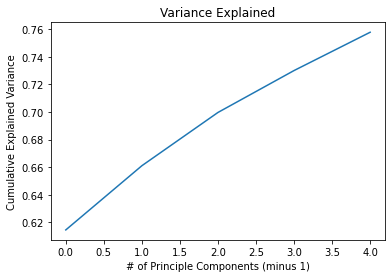

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Variance Explained')
plt.xlabel('# of Principle Components (minus 1)')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In the above plot we can see that 5 principle components are needed to retain at least 75% of the covariance matrix.

In [14]:
num_components = pca.n_components_
print(f'{num_components} principal components are needed to retain at least 75% of the covariance matrix.')

5 principal components are needed to retain at least 75% of the covariance matrix.


In [15]:
pca.explained_variance_ratio_

array([0.61454966, 0.04649942, 0.03857783, 0.03035471, 0.02773337])

In [16]:
pc1and2 = pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]
pc1and2and3 = pc1and2 + pca.explained_variance_ratio_[2]
pc1and2and3and4 = pc1and2and3 + pca.explained_variance_ratio_[3]
pc1and2and3and4and5 = pc1and2and3and4 + pca.explained_variance_ratio_[4]
print(f'Principal components 1 and 2 retain {pc1and2:.2%} of the covariance matrix.')
print(f'Principal components 1, 2, and 3 retain {pc1and2and3:.2%} of the covariance matrix.')
print(f'Principal components 1, 2, 3 and 4 retain {pc1and2and3and4:.2%} of the covariance matrix.')
print(f'Principal components 1, 2, 3, 4, and 5 retain {pc1and2and3and4and5:.2%} of the covariance matrix.')

Principal components 1 and 2 retain 66.10% of the covariance matrix.
Principal components 1, 2, and 3 retain 69.96% of the covariance matrix.
Principal components 1, 2, 3 and 4 retain 73.00% of the covariance matrix.
Principal components 1, 2, 3, 4, and 5 retain 75.77% of the covariance matrix.


From the above, we can see that 5 principle components are needed to retain at least 75% of the covariance matrix. The first 5 principle components retain approximately 75.77% of the covariance matrix to be exact. 

**Therefore, we were able to reduce this 35-factor time series down to 5 principal components while still retaining around 75% of the data.**

Let's create a data frame of the principle components.

In [17]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.000455,0.757868,-0.381764,-0.275454,0.142558
1,3.086331,0.390242,-0.053946,-0.167814,0.092864
2,-1.261839,-0.661366,-1.083793,-1.009027,0.045604
3,0.297271,-0.612317,-0.116576,-0.037062,0.229490
4,4.007935,-0.407811,-0.852644,0.197628,-0.350987


In [18]:
pca_df.describe()

,PC1,PC2,PC3,PC4,PC5
count,9.480000e+02,9.480000e+02,9.480000e+02,9.480000e+02,9.480000e+02
mean,-9.691029e-17,4.011091e-17,-4.148697e-17,-1.460974e-16,1.955773e-17
std,4.640253e+00,1.276400e+00,1.162605e+00,1.031279e+00,9.857449e-01
min,-2.398192e+01,-4.524053e+00,-5.092052e+00,-3.235634e+00,-4.630342e+00
25%,-2.315330e+00,-6.705061e-01,-6.672494e-01,-6.195887e-01,-4.948255e-01
50%,2.454947e-01,-4.322645e-02,3.350522e-02,-6.840732e-02,8.351904e-02
75%,2.458236e+00,5.900083e-01,6.541707e-01,5.812460e-01,6.176982e-01
max,3.307268e+01,1.094952e+01,8.468182e+00,5.759921e+00,5.117992e+00


In [19]:
my_df = pd.DataFrame(pca.components_, columns=columns)
my_df

,Mkt-RF,SMB,HML,RF,Mom,Food,Beer,Smoke,Games,Books,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
0,0.211184,0.085555,0.060507,-0.005849,-0.082852,0.186008,0.162178,0.132754,0.186251,0.186186,...,0.156702,0.107432,0.173477,0.190838,0.190557,0.180736,0.188828,0.172392,0.199305,0.187539
1,-0.045272,0.056245,0.653454,-0.044513,-0.430891,-0.087717,-0.045130,-0.068473,0.004763,-0.013373,...,-0.122855,-0.294500,-0.234265,-0.043770,0.167131,-0.031267,-0.124136,-0.084765,0.046784,-0.053413
2,-0.034379,0.654328,-0.118565,-0.297945,0.048858,-0.210301,0.018470,-0.286251,0.068416,0.051040,...,-0.172274,0.200929,0.091026,-0.049911,0.022451,0.114656,-0.035325,0.065437,-0.116151,0.072127
3,-0.113675,0.343725,0.113153,0.622030,-0.083110,0.105225,0.164941,0.125186,0.104434,0.125370,...,-0.006558,0.019117,-0.144170,-0.103456,-0.002976,0.147965,0.100233,0.145218,0.018184,0.032707
4,-0.000857,-0.006084,-0.043509,-0.561049,-0.331947,0.051760,0.021290,-0.008611,0.084505,0.027753,...,0.074582,-0.126922,0.025313,-0.023945,-0.049511,0.004622,0.156178,0.052533,0.059157,0.032459


The above data frame has the 3 principle components for each row with their corresponding eigenvectors. Each value in each eigen vector maps to a factor.

Let's now find the most important factor of each principle component by figuring out which factors are contributing most to each principle component.

In [20]:
# get the index of the most important factor on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(num_components)]

# get the most important factor names
most_important_names = [columns[most_important[i]] for i in range(num_components)]
print(most_important_names)

['Mkt-RF', 'HML', 'SMB', 'RF', 'Coal']


**From the above, we can see that in the first principle component, Mkt-RF is the most important (and therefore the most important factor). It is followed by HML, then SMB, then RF, and finally Coal.**

### Part 2
Plot the principal components PC1, PC2.  

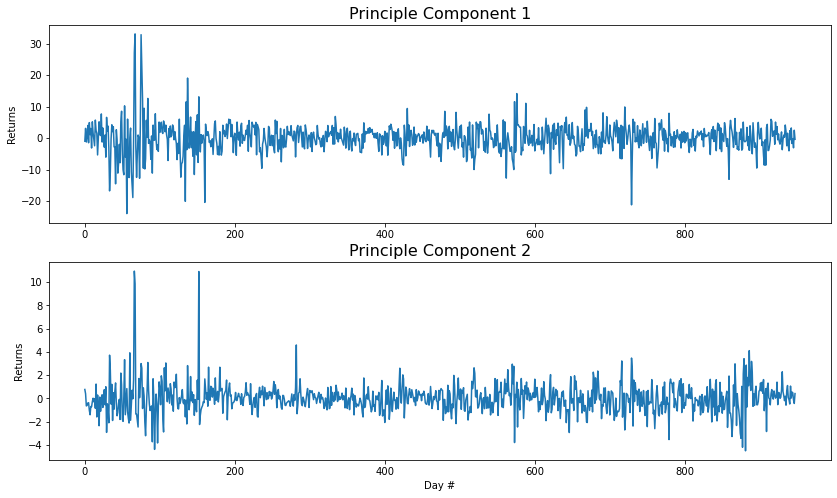

In [21]:
plt.figure(figsize=(14,8))

plt.subplot(2,1,1)
plt.plot(pca_df.PC1)
plt.title('Principle Component 1', fontsize=16)
plt.ylabel('Returns')

plt.subplot(2,1,2)
plt.plot(pca_df.PC2)
plt.title('Principle Component 2', fontsize=16)
plt.xlabel('Day #')
plt.ylabel('Returns')

plt.show()

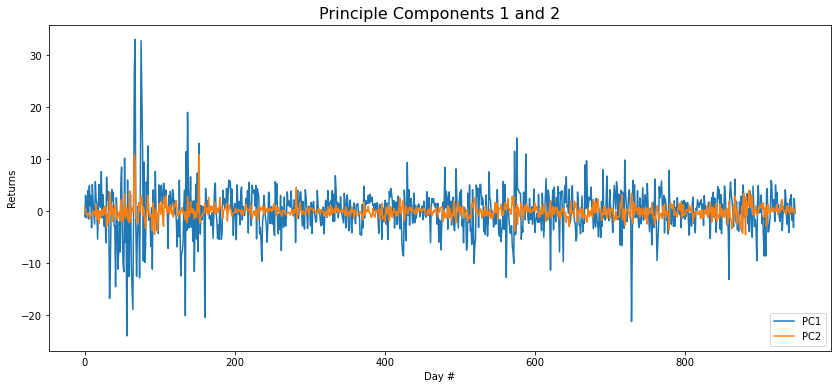

In [22]:
plt.figure(figsize=(14,6))

plt.plot(pca_df.PC1, label='PC1')
plt.title('Principle Components 1 and 2', fontsize=16)
plt.plot(pca_df.PC2, label='PC2')
plt.legend(loc=4)
plt.xlabel('Day #')
plt.ylabel('Returns')

plt.show()